# Metadata

```yaml
Course:    DS 5001
Module:    10 Lab
Topic:     Sentiment Analysis of Novels 
Author:    R.C. Alvarado
Date:      02 April 2023 (revised)
```
**Purpose:** Use the NRC lexicon to explore sentiment in two novels.

# Set Up

## Config

In [1]:
import configparser
config = configparser.ConfigParser()
config.read("../../../env.ini")
data_home = config['DEFAULT']['data_home']
output_dir = config['DEFAULT']['output_dir']
local_lib = config['DEFAULT']['local_lib']

In [2]:
data_prefix = 'novels'

In [3]:
novels_csv =  f'{data_home}/novels/{data_prefix}-TOKENS.csv'
OHCO = ['book', 'chapter', 'para_num', 'sent_num'] # We exclude genre
CHAPS = OHCO[2:3]
PARAS = OHCO[2:4]
SENTS = OHCO[2:5]

In [4]:
dracula = ('stoker','dracula')
norabbey = ('austen','northangerabbey')

In [5]:
salex_csv = f'{data_home}/lexicons/salex_nrc.csv'
nrc_cols = "nrc_negative nrc_positive nrc_anger nrc_anticipation nrc_disgust nrc_fear nrc_joy nrc_sadness nrc_surprise nrc_trust".split()
# emo = 'polarity'
emo = 'sentiment'

## Import

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display, HTML

In [7]:
sns.set()

# Get Lexicon

In [8]:
salex = pd.read_csv(salex_csv).set_index('term_str')
salex.columns = [col.replace('nrc_','') for col in salex.columns]

In [9]:
salex

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,sentiment
term_str,,,,,,,,,,,
abandon,0,0,0,1,0,1,0,1,0,0,-1
abandoned,1,0,0,1,0,1,0,1,0,0,-1
abandonment,1,0,0,1,0,1,0,1,1,0,-1
abduction,0,0,0,1,0,1,0,1,1,0,-1
aberration,0,0,1,0,0,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
young,0,1,0,0,1,0,1,0,1,0,1
youth,1,1,0,1,1,0,1,0,1,0,1
zeal,0,1,0,0,1,0,1,0,1,1,1


## Get lexicon columns

In [10]:
emo_cols = "anger anticipation disgust fear joy sadness surprise trust sentiment".split()

In [11]:
emo_cols 

['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust',
 'sentiment']

# Get Novels

In [12]:
novels_csv

'/home/rca2t/Documents/MSDS/DS5001/data/novels/novels-TOKENS.csv'

In [13]:
LIB = pd.read_csv(f"{data_home}/novels/{data_prefix}-LIB.csv").set_index('book').sort_index()

In [14]:
LIB

,genre,author
book,,
adventures,d,doyle
baskervilles,d,doyle
castleofotranto,g,walpole
christmascarole,g,dickens
dracula,g,stoker
frankenstein,g,shelley
marieroget,d,poe
monk,g,lewis
moonstone,d,collins


In [15]:
TOKENS = pd.read_csv(novels_csv).set_index(OHCO).sort_index()
TOKENS = TOKENS.join(LIB)
TOKENS = TOKENS.reset_index().set_index(['author']+OHCO)

In [16]:
TOKENS.head()

token_num  pos term_str  term_id  \
author book       chapter para_num sent_num                                     
doyle  adventures 1       0        1                 0   DT        a        0   
                                   1                 1  NNP  scandal    20966   
                                   1                 2  NNP       in    12267   
                                   1                 3  NNP  bohemia     2658   
                          1        0                 0   NN        i    11947   

                                            genre  
author book       chapter para_num sent_num        
doyle  adventures 1       0        1            d  
                                   1            d  
                                   1            d  
                                   1            d  
                          1        0            d

In [17]:
TOKENS = TOKENS.join(salex, on='term_str', how='left')
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

In [18]:
TOKENS[salex.columns].sample(10)

anger  anticipation  \
author    book            chapter para_num sent_num                        
radcliffe udolpho         20      73       2           1.0           0.0   
christie  secretadversary 25      86       6           0.0           0.0   
          styles          5       147      0           0.0           0.0   
radcliffe udolpho         30      23       2           0.0           0.0   
lewis     monk            5       83       0           0.0           0.0   
radcliffe udolpho         36      48       0           0.0           0.0   
collins   moonstone       87      91       0           0.0           0.0   
doyle     scarlet         11      22       0           0.0           0.0   
collins   moonstone       65      42       0           0.0           0.0   
                          87      30       4           0.0           0.0   

                                                     disgust  fear  joy  \
author    book            chapter para_num sent_num                       
radcliffe udolpho         20      73       2             1.0   1.0  0.0   
christie  secretadversary 25      86       6             0.0   0.0  0.0   
          styles          5       147      0             0.0   0.0  0.0   
radcliffe udolpho         30      23       2             0.0   0.0  0.0   
lewis     monk            5       83       0             0.0   0.0  0.0   
radcliffe udolpho         36      48       0             0.0   0.0  0.0   
collins   moonstone       87      91       0             0.0   0.0  0.0   
doyle     scarlet         11      22       0             0.0   0.0  0.0   
collins   moonstone       65      42       0             0.0   0.0  0.0   
                          87      30       4             0.0   0.0  0.0   

                                                     negative  positive  \
author    book            chapter para_num sent_num                       
radcliffe udolpho         20      73       2              1.0       0.0   
christie  secretadversary 25      86       6              NaN       NaN   
          styles          5       147      0              NaN       NaN   
radcliffe udolpho         30      23       2              NaN       NaN   
lewis     monk            5       83       0              NaN       NaN   
radcliffe udolpho         36      48       0              NaN       NaN   
collins   moonstone       87      91       0              NaN       NaN   
doyle     scarlet         11      22       0              NaN       NaN   
collins   moonstone       65      42       0              NaN       NaN   
                          87      30       4              NaN       NaN   

                                                     sadness  surprise  trust  \
author    book            chapter para_num sent_num                             
radcliffe udolpho         20      73       2             0.0       0.0    0.0   
christie  secretadversary 25      86       6             0.0       0.0    0.0   
          styles          5       147      0             0.0       0.0    0.0   
radcliffe udolpho         30      23       2             0.0       0.0    0.0   
lewis     monk            5       83       0             0.0       0.0    0.0   
radcliffe udolpho         36      48       0             0.0       0.0    0.0   
collins   moonstone       87      91       0             0.0       0.0    0.0   
doyle     scarlet         11      22       0             0.0       0.0    0.0   
collins   moonstone       65      42       0             0.0       0.0    0.0   
                          87      30       4             0.0       0.0    0.0   

                                                     sentiment  
author    book            chapter para_num sent_num             
radcliffe udolpho         20      73       2              -1.0  
christie  secretadversary 25      86       6               0.0  
          styles          5       147      0               0.0  
radcliffe udolpho         30      23    

In [19]:
TOKENS[['term_str'] + emo_cols].sample(10)

,,,,,term_str,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,sentiment
author,book,chapter,para_num,sent_num,,,,,,,,,,
reeve,oldenglishbaron,3,114,4,is,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
radcliffe,udolpho,1,22,3,charities,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
collins,moonstone,88,246,1,man,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lewis,monk,8,95,2,he,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stoker,dracula,19,21,0,with,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
radcliffe,udolpho,13,75,4,of,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
austen,northangerabbey,12,3,9,the,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
collins,moonstone,49,2,9,concluded,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
shelley,frankenstein,46,6,1,them,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

In [21]:
TOKENS.head()

token_num  pos term_str  term_id  \
author book       chapter para_num sent_num                                     
doyle  adventures 1       0        1                 0   DT        a        0   
                                   1                 1  NNP  scandal    20966   
                                   1                 2  NNP       in    12267   
                                   1                 3  NNP  bohemia     2658   
                          1        0                 0   NN        i    11947   

                                            genre  anger  anticipation  \
author book       chapter para_num sent_num                              
doyle  adventures 1       0        1            d    0.0           0.0   
                                   1            d    0.0           0.0   
                                   1            d    0.0           0.0   
                                   1            d    0.0           0.0   
                          1        0            d    0.0           0.0   

                                             disgust  fear  joy  negative  \
author book       chapter para_num sent_num                                 
doyle  adventures 1       0        1             0.0   0.0  0.0       NaN   
                                   1             0.0   1.0  0.0       1.0   
                                   1             0.0   0.0  0.0       NaN   
                                   1             0.0   0.0  0.0       NaN   
                          1        0             0.0   0.0  0.0       NaN   

                                             positive  sadness  surprise  \
author book       chapter para_num sent_num                                
doyle  adventures 1       0        1              NaN      0.0       0.0   
                                   1              0.0      0.0       0.0   
                                   1              NaN      0.0       0.0   
                                   1              NaN      0.0       0.0   
                          1        0              NaN      0.0       0.0   

                                             trust  sentiment  
author book       chapter para_num sent_num                    
doyle  adventures 1       0        1           0.0        0.0  
                                   1           0.0       -1.0  
                                   1           0.0        0.0  
                                   1           0.0        0.0  
                          1        0           0.0        0.0

In [22]:
DRACULA = TOKENS.sort_index().loc[dracula].copy()
NORABBEY = TOKENS.sort_index().loc[norabbey].copy()

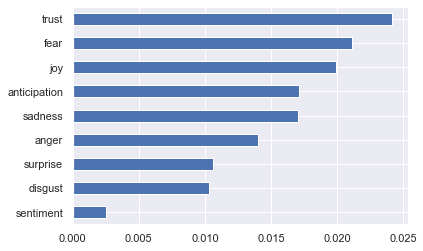

In [23]:
DRACULA[emo_cols].mean().sort_values().plot.barh();

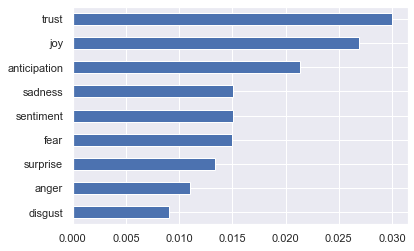

In [24]:
NORABBEY[emo_cols].mean().sort_values().plot.barh();

## Sentiment by Chapter

In [25]:
DRACULA_chaps = DRACULA.groupby(CHAPS)[emo_cols].mean()

In [26]:
NORABBEY_chaps = NORABBEY.groupby(CHAPS)[emo_cols].mean()

In [27]:
def plot_sentiments(df, emo='sentiment'):
    FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

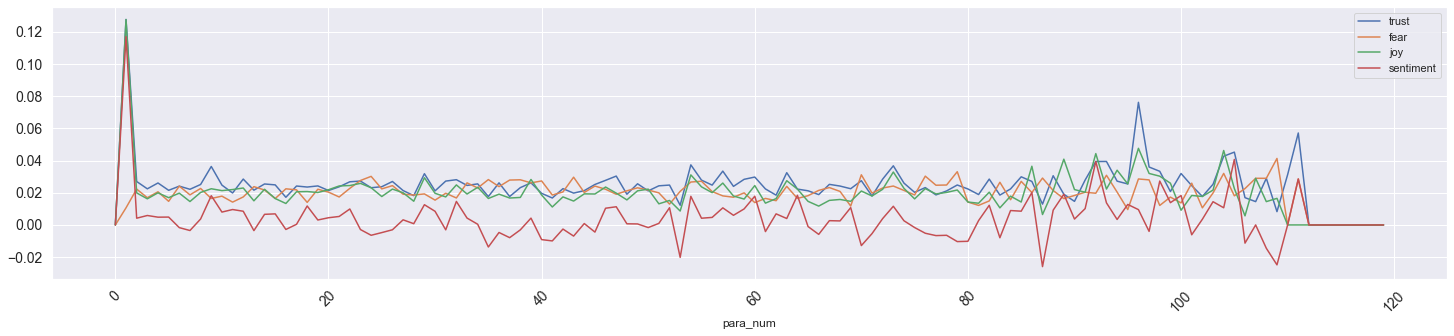

In [28]:
plot_sentiments(DRACULA_chaps, ['trust','fear','joy','sentiment'])

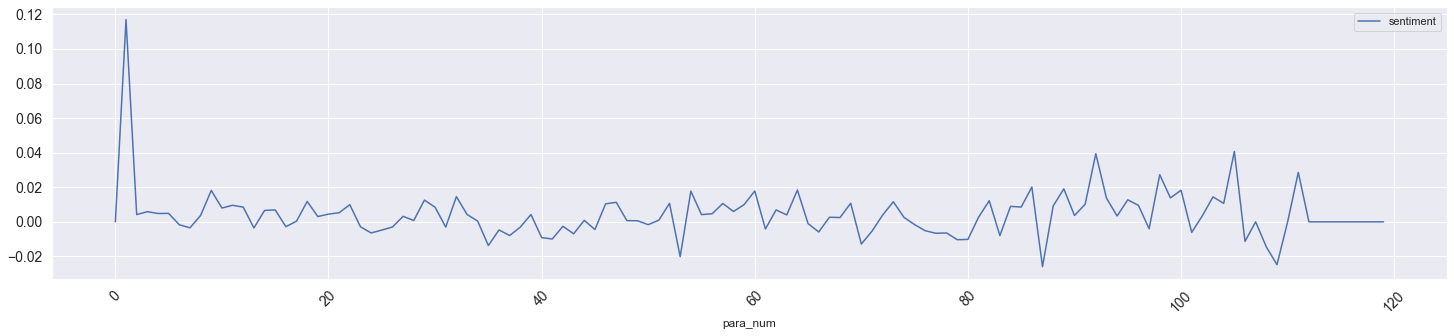

In [29]:
plot_sentiments(DRACULA_chaps, ['sentiment'])

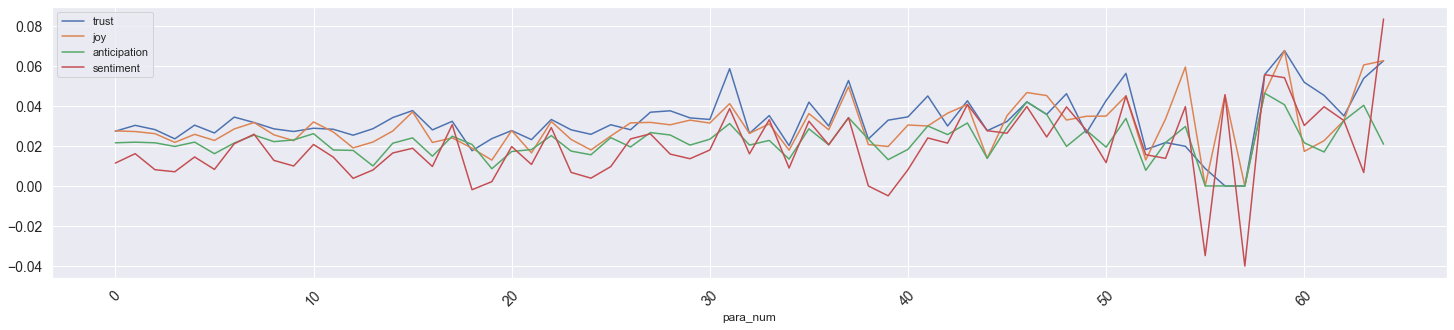

In [30]:
plot_sentiments(NORABBEY_chaps, ['trust','joy','anticipation','sentiment'])

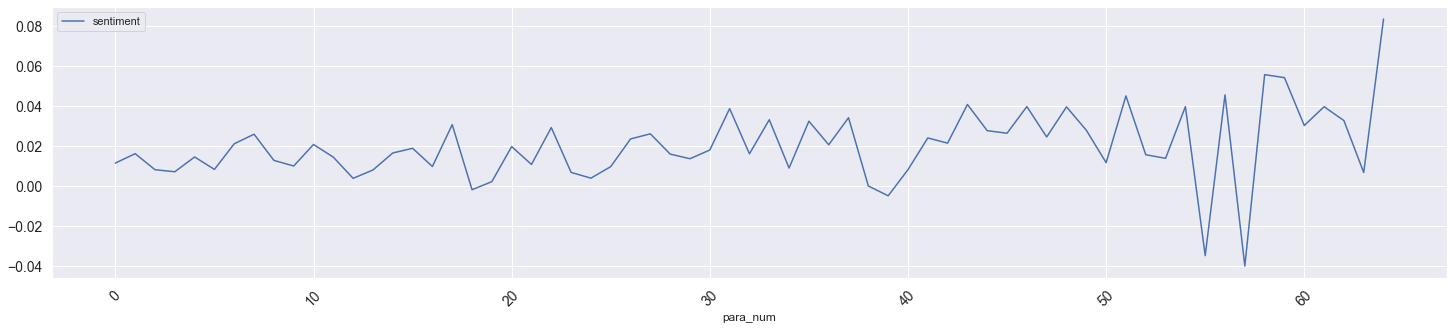

In [31]:
plot_sentiments(NORABBEY_chaps, ['sentiment'])

# Explore Sentiment in Texts

In [32]:
# DRACULA

In [33]:
DRACULA['html'] =  DRACULA.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.term_str), 1)
NORABBEY['html'] =  NORABBEY.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.term_str), 1)

In [34]:
DRACULA['html'].sample(10)

chapter  para_num  sent_num
15       11        11               <span class='sent0'>go</span>
25       3         2                <span class='sent0'>or</span>
7        65        8            <span class='sent0'>swales</span>
1        7         4           <span class='sent0'>germany</span>
18       35        6                 <span class='sent0'>i</span>
27       53        8             <span class='sent0'>wagon</span>
11       30        4                <span class='sent0'>at</span>
21       30        10            <span class='sent0'>close</span>
7        4         0            <span class='sent0'>whitby</span>
6        59        1                <span class='sent0'>in</span>
Name: html, dtype: object

In [35]:
DRACULA_sents = DRACULA.groupby(SENTS)[emo_cols].mean()
NORABBEY_sents = NORABBEY.groupby(SENTS)[emo_cols].mean()

In [36]:
DRACULA_sents['sent_str'] = DRACULA.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
DRACULA_sents['html_str'] = DRACULA.groupby(SENTS).html.apply(lambda x: x.str.cat(sep=' '))

In [37]:
NORABBEY_sents['sent_str'] = NORABBEY.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
NORABBEY_sents['html_str'] = NORABBEY.groupby(SENTS).html.apply(lambda x: x.str.cat(sep=' '))

In [38]:
def sample_sentences(df):
    rows = []
    for idx in df.sample(10).index:

        valence = round(df.loc[idx, emo], 4)     
        t = 0
        if valence > t: color = '#ccffcc'
        elif valence < t: color = '#ffcccc'
        else: color = '#f2f2f2'
        z=0
        rows.append("""<tr style="background-color:{0};padding:.5rem 1rem;font-size:110%;">
        <td>{1}</td><td>{3}</td><td width="400" style="text-align:left;">{2}</td>
        </tr>""".format(color, valence, df.loc[idx, 'html_str'], idx))

    display(HTML('<style>#sample1 td{font-size:120%;vertical-align:top;} .sent-1{color:red;font-weight:bold;} .sent1{color:green;font-weight:bold;}</style>'))
    display(HTML('<table id="sample1"><tr><th>Sentiment</th><th>ID</th><th width="600">Sentence</th></tr>'+''.join(rows)+'</table>'))

In [48]:
sample_sentences(DRACULA_sents)

In [40]:
sample_sentences(NORABBEY_sents)

## VADER

In [41]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [42]:
DRACULA_vader_cols = DRACULA_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
DRACULA_vader = pd.concat([DRACULA_sents, DRACULA_vader_cols], axis=1)

In [43]:
# DRACULA_vader

In [44]:
DRACULA_vader.head()

anger  anticipation   disgust      fear       joy  \
para_num sent_num                                                         
0        0         0.000000      0.000000  0.000000  0.000000  0.000000   
         1         0.000000      0.000000  0.000000  0.000000  0.000000   
1        0         0.010638      0.000000  0.010638  0.010638  0.127660   
2        0         0.013812      0.016575  0.011050  0.013812  0.038674   
         1         0.002481      0.004963  0.004963  0.009926  0.012407   

                    sadness  surprise     trust  sentiment  \
para_num sent_num                                            
0        0         0.000000  0.000000  0.000000   0.000000   
         1         0.000000  0.000000  0.000000   0.000000   
1        0         0.010638  0.000000  0.127660   0.117021   
2        0         0.019337  0.019337  0.038674   0.019337   
         1         0.012407  0.000000  0.009926   0.007444   

                                                            sent_str  \
para_num sent_num                                                      
0        0         jonathan harkers journal i ii v letter from mi...   
         1                                           arthur holmwood   
1        0         kept in shorthand jonathan harkers journal con...   
2        0         may may i must have been asleep for certainly ...   
         1         bistritz left munich at p m on may arriving at...   

                                                            html_str    neg  \
para_num sent_num                                                             
0        0         <span class='sent0'>jonathan</span> <span clas...  0.076   
         1         <span class='sent0'>arthur</span> <span class=...  0.000   
1        0         <span class='sent0'>kept</span> <span class='s...  0.016   
2        0         <span class='sent0'>may</span> <span class='se...  0.076   
         1         <span class='sent0'>bistritz</span> <span clas...  0.060   

                     neu    pos  compound  
para_num sent_num                          
0        0         0.924  0.000   -0.2960  
         1         1.000  0.000    0.0000  
1        0         0.984  0.000   -0.1280  
2        0         0.813  0.111    0.9247  
         1         0.825  0.115    0.9838

<AxesSubplot:xlabel='para_num,sent_num'>

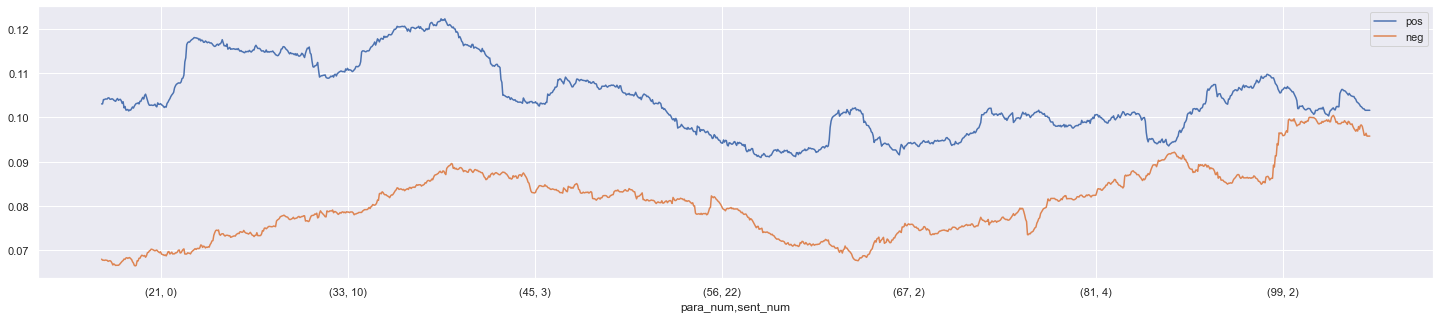

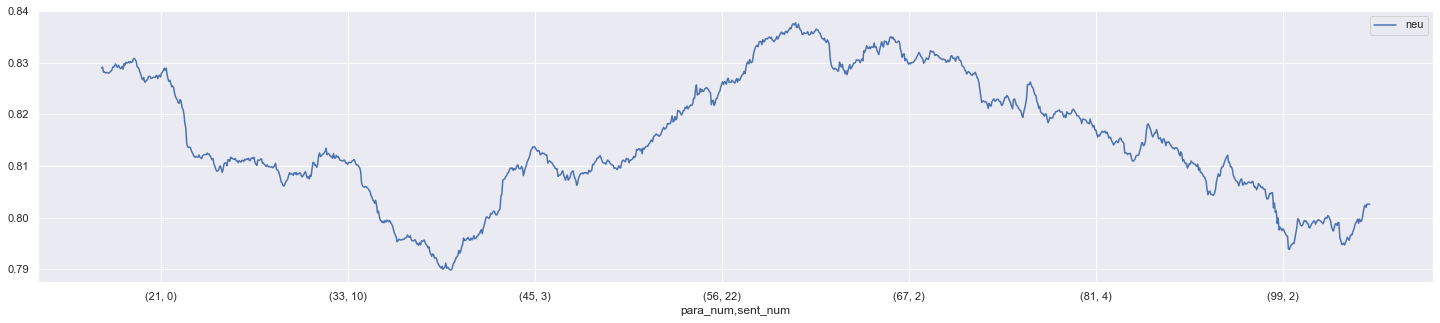

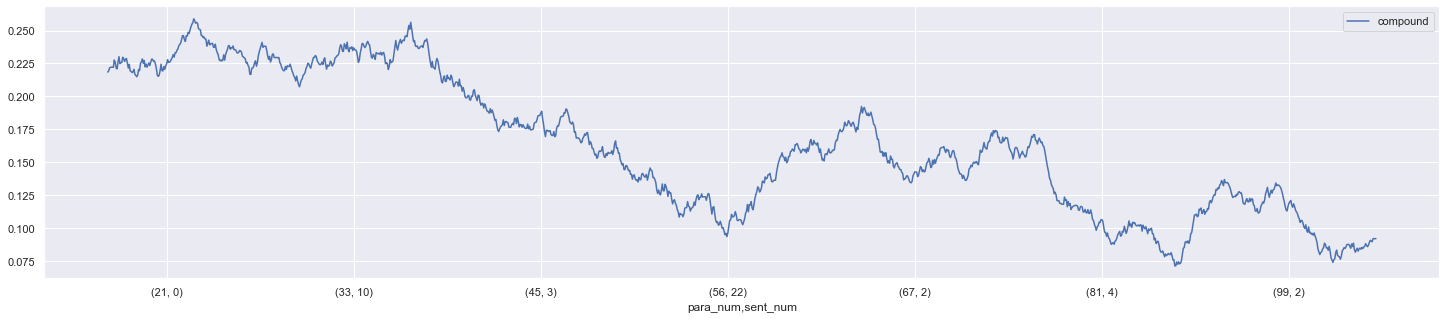

In [45]:
w = int(DRACULA_vader.shape[0] / 5)
DRACULA_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5))
DRACULA_vader[['neu']].rolling(w).mean().plot(figsize=(25,5))
DRACULA_vader[['compound']].rolling(w).mean().plot(figsize=(25,5))

In [46]:
NORABBEY_vader_cols = NORABBEY_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
NORABBEY_vader = pd.concat([NORABBEY_sents, NORABBEY_vader_cols], axis=1)

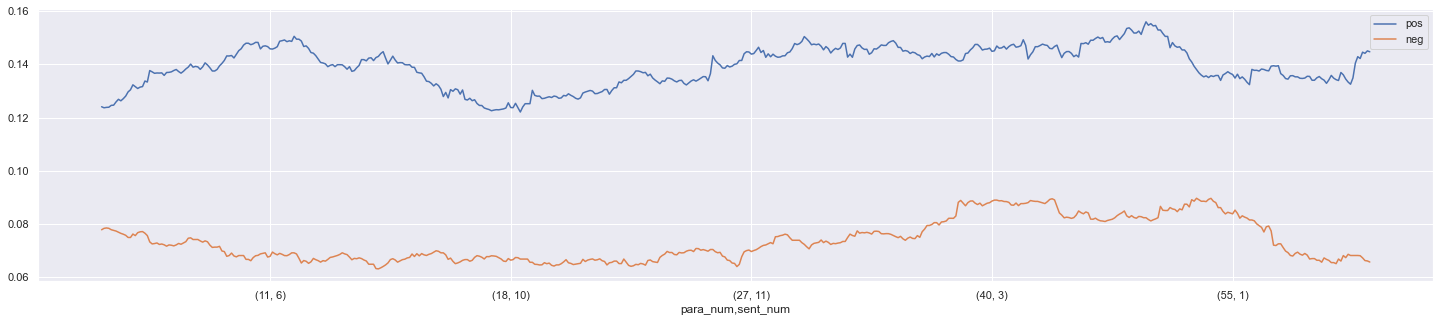

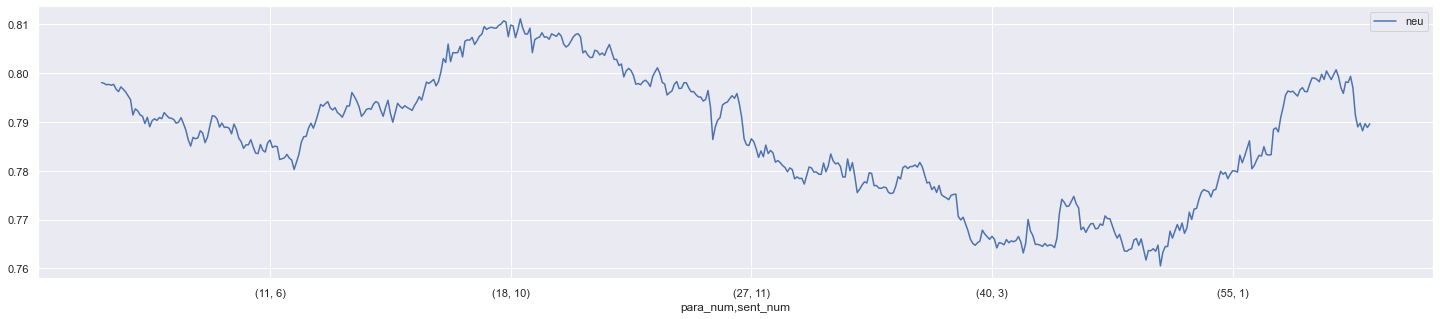

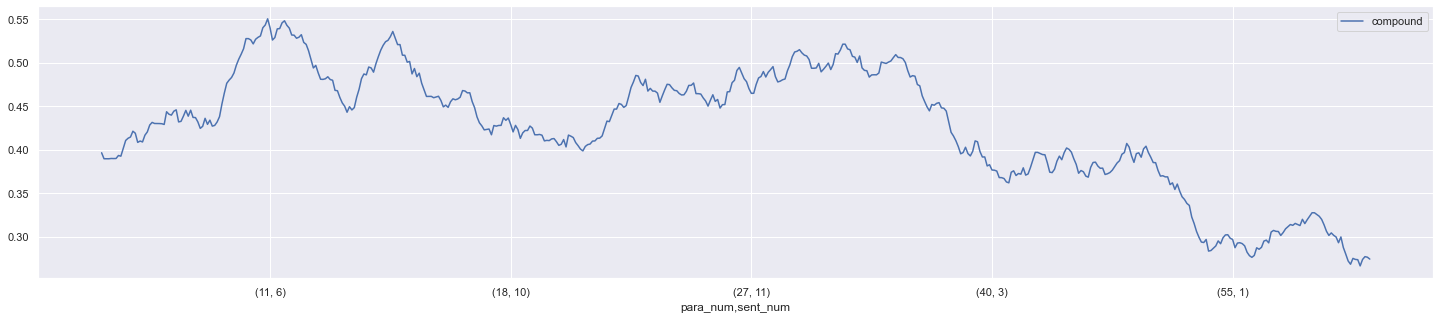

In [47]:
w = int(NORABBEY_vader.shape[0] / 5)
NORABBEY_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5));
NORABBEY_vader[['neu']].rolling(w).mean().plot(figsize=(25,5));
NORABBEY_vader[['compound']].rolling(w).mean().plot(figsize=(25,5));